In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##### importing the dataset

In [4]:
train = pd.read_csv("C:\\Users\\Asus\\Desktop\\train1.csv")

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### checking for null values in the dataset

<AxesSubplot:>

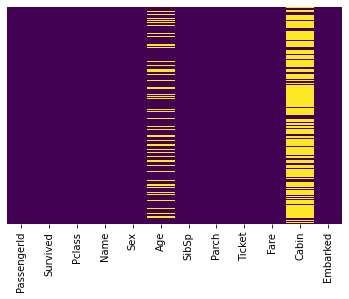

In [10]:
sns.heatmap(train.isnull(),yticklabels= False,cbar=False,cmap='viridis')

##### total number of passengers survived(1 = survived, 0= didn't survive)

<AxesSubplot:xlabel='Survived', ylabel='count'>

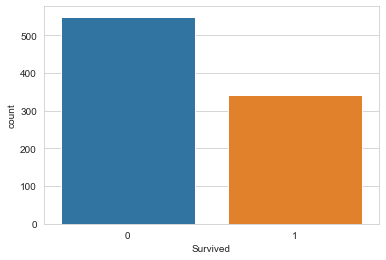

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

##### survivability of passengers with respect to gender

<AxesSubplot:xlabel='Survived', ylabel='count'>

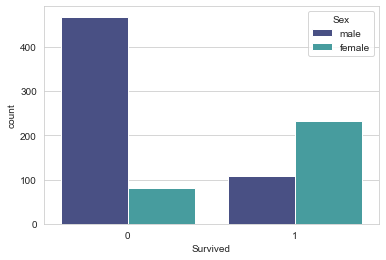

In [13]:
sns.set_style("whitegrid")
sns.countplot(x='Survived',hue="Sex",data= train,palette="mako")

##### survivability of passengers with respect to Class they were traveeling in 

<AxesSubplot:xlabel='Survived', ylabel='count'>

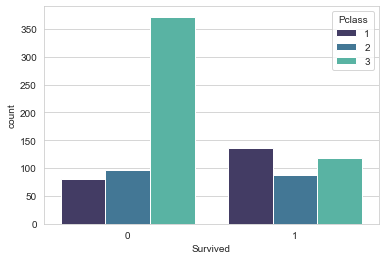

In [14]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",hue="Pclass",data=train,palette="mako")

##### Age distribution of passengers

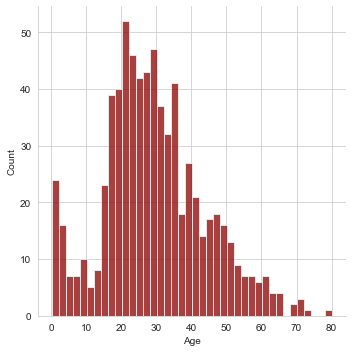

In [16]:
sns.displot(train["Age"].dropna(),kde=False,color='darkred',bins=40)

##### count of people travelling with siblings or spouses
  0 represents no spouse or siblings 
  a number represnts traveling with someone

<AxesSubplot:xlabel='SibSp', ylabel='count'>

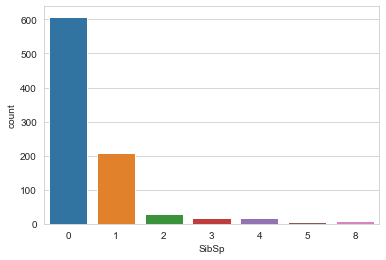

In [17]:
sns.countplot(x="SibSp",data=train)

##### average age of passengers in each class

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

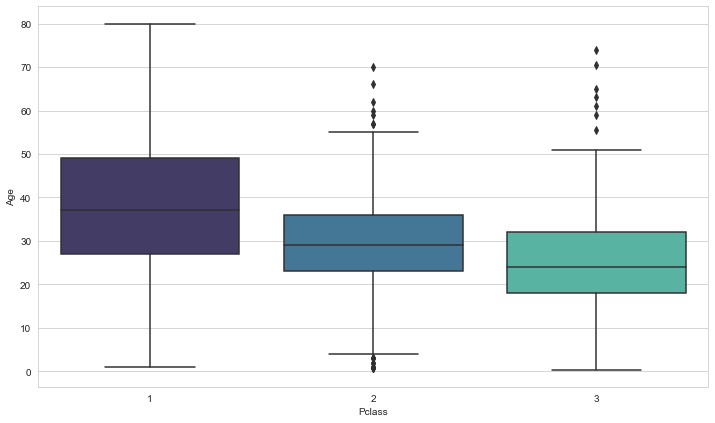

In [19]:
plt.figure(figsize=(12, 7))
sns.boxplot(x="Pclass",y= "Age",data=train,palette="mako")

##### replacing null age values with average ages with respect to class of the passengers

In [20]:
def impute_age(cols):
    age = cols[0]
    Pclass = cols[1]

    if pd.isnull(age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return age

In [21]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

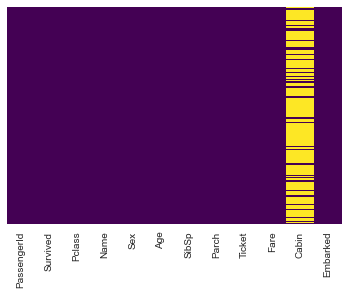

In [23]:
sns.heatmap(train.isnull(),yticklabels= False,cbar = False,cmap='viridis')

##### dropping the cabin column since its not of any significance

In [24]:
train.drop('Cabin', axis= 1,inplace= True)

##### the dataset has been cleaned and ready for further analysis

<AxesSubplot:>

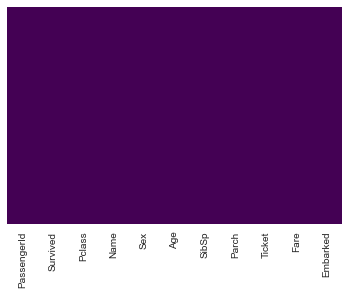

In [25]:
sns.heatmap(train.isnull(),yticklabels= False,cbar = False,cmap='viridis')

In [26]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
